# Trending tweets analysis
In this notebook we do an analysis of the trending tweets which we crawl every 6 hours using [TweetCrawler](https://github.com/bagdeabhishek/TweetCrawlMultiThreaded) library which I've written. One reason for this is to identify and observe behaviour of the trending topics which trend on twitter. Identifying twitter accounts which are continously tweeting biased views can help us identify if there is underlying connection between these accounts. 
## Checking the most active handles 
In the below section we want to get the most active 100 handles from each cluster. Note that this clustering is derived from our [previous analysis](./twitterAnalysis), you can refer the blog in detail to get an idea on how clustered these political tweets. The main point is this clustering is algorithmic and free from Human induced biases. 
We now get the top 100 handles and plot a word cloud of these handles. We also plot a bargraph to show the number of tweets these handles push out. 

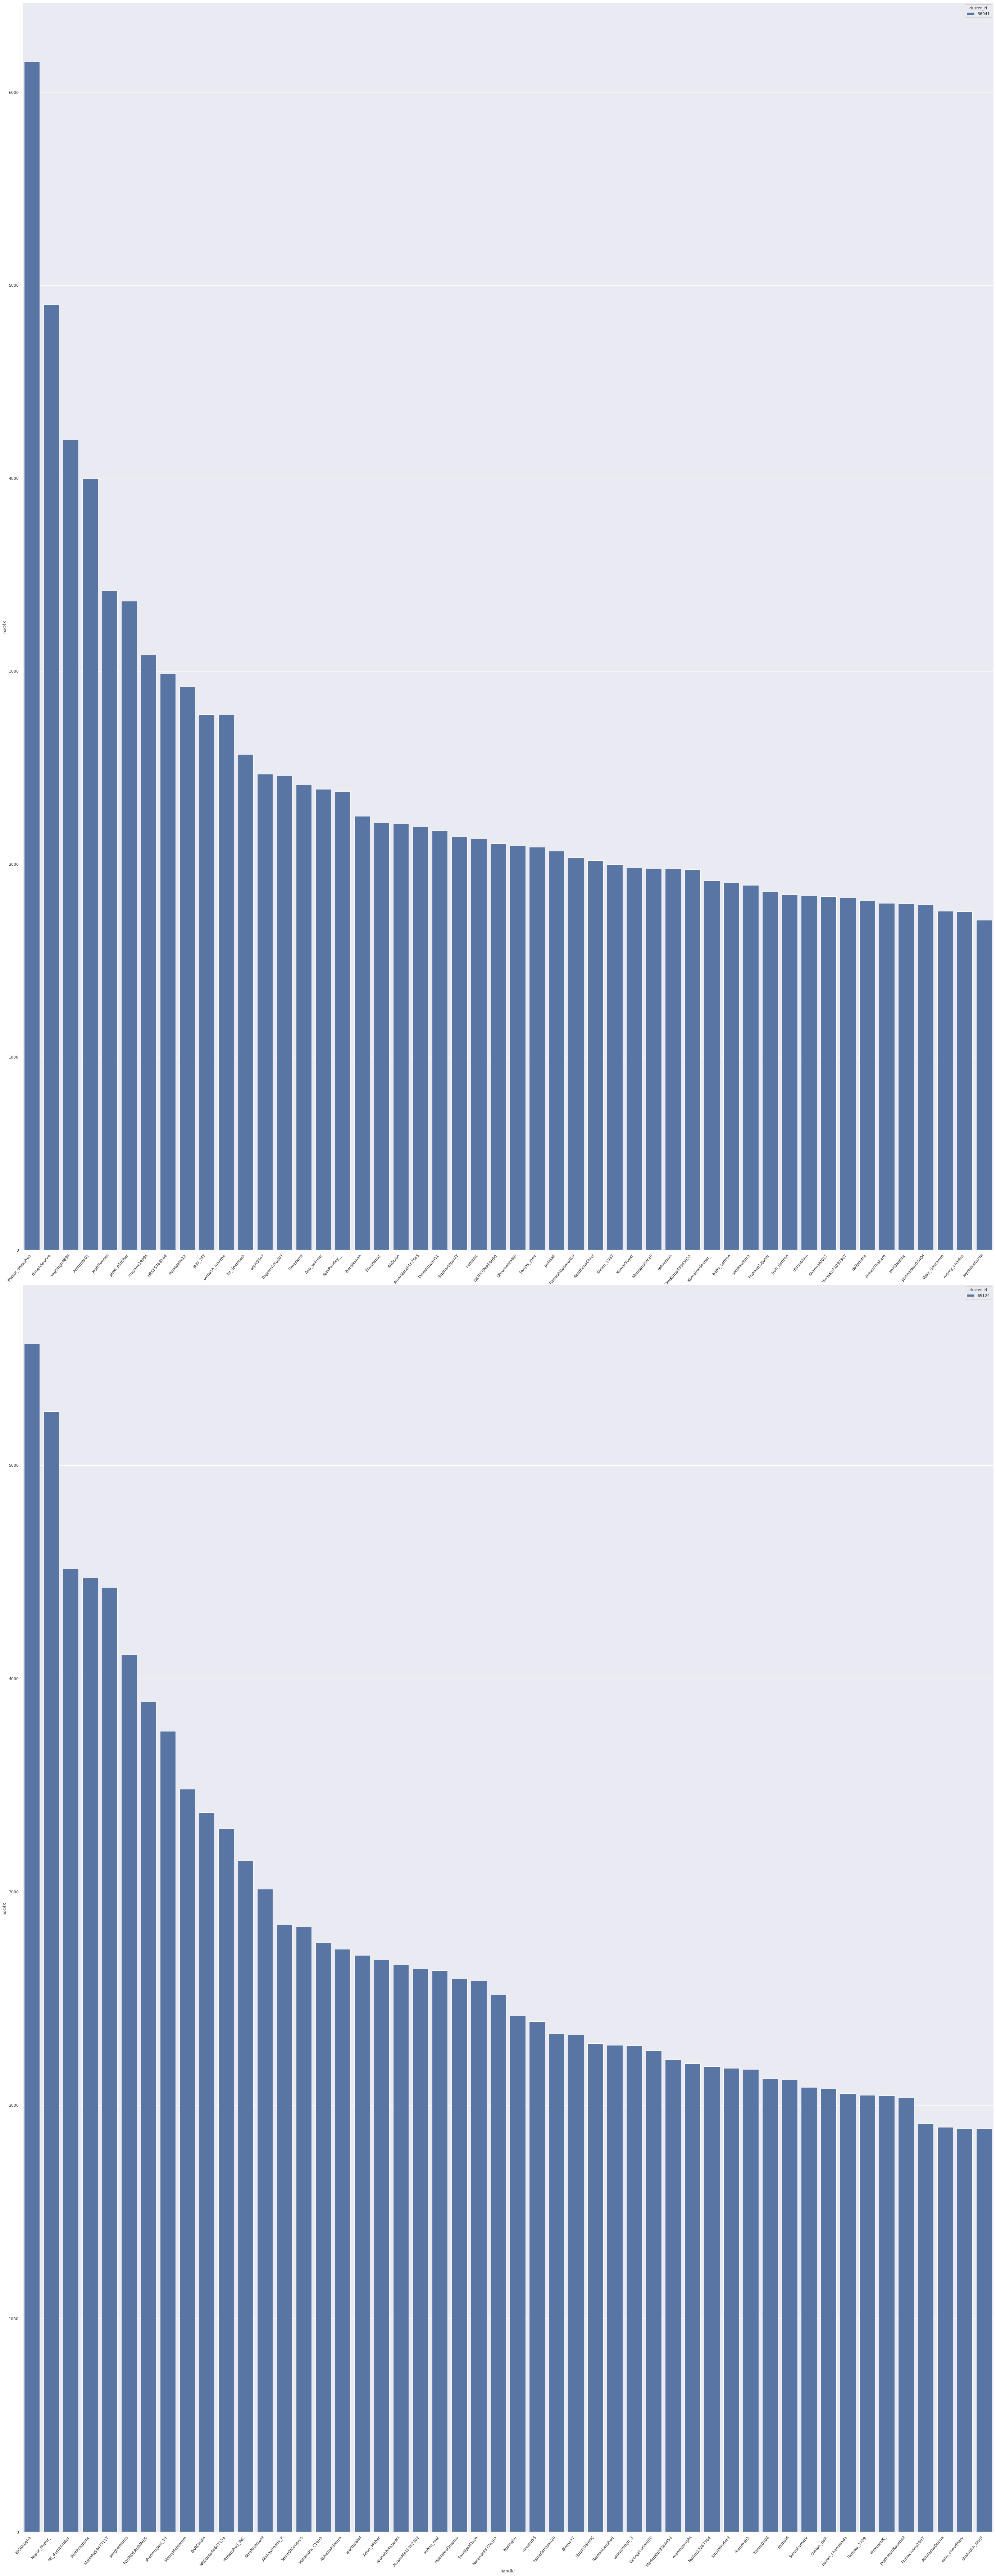

In [1]:
from TwitterUtil import TwitterUtil
import pandas as pd
tu = TwitterUtil()
df = pd.read_pickle(tu.MRH_TIME_FILE_PATH)
tu.get_barcharts(df,column_name='handle')

We can see that most of the handles have similar counts, now we plot the word clouds to easily visualize these handles 

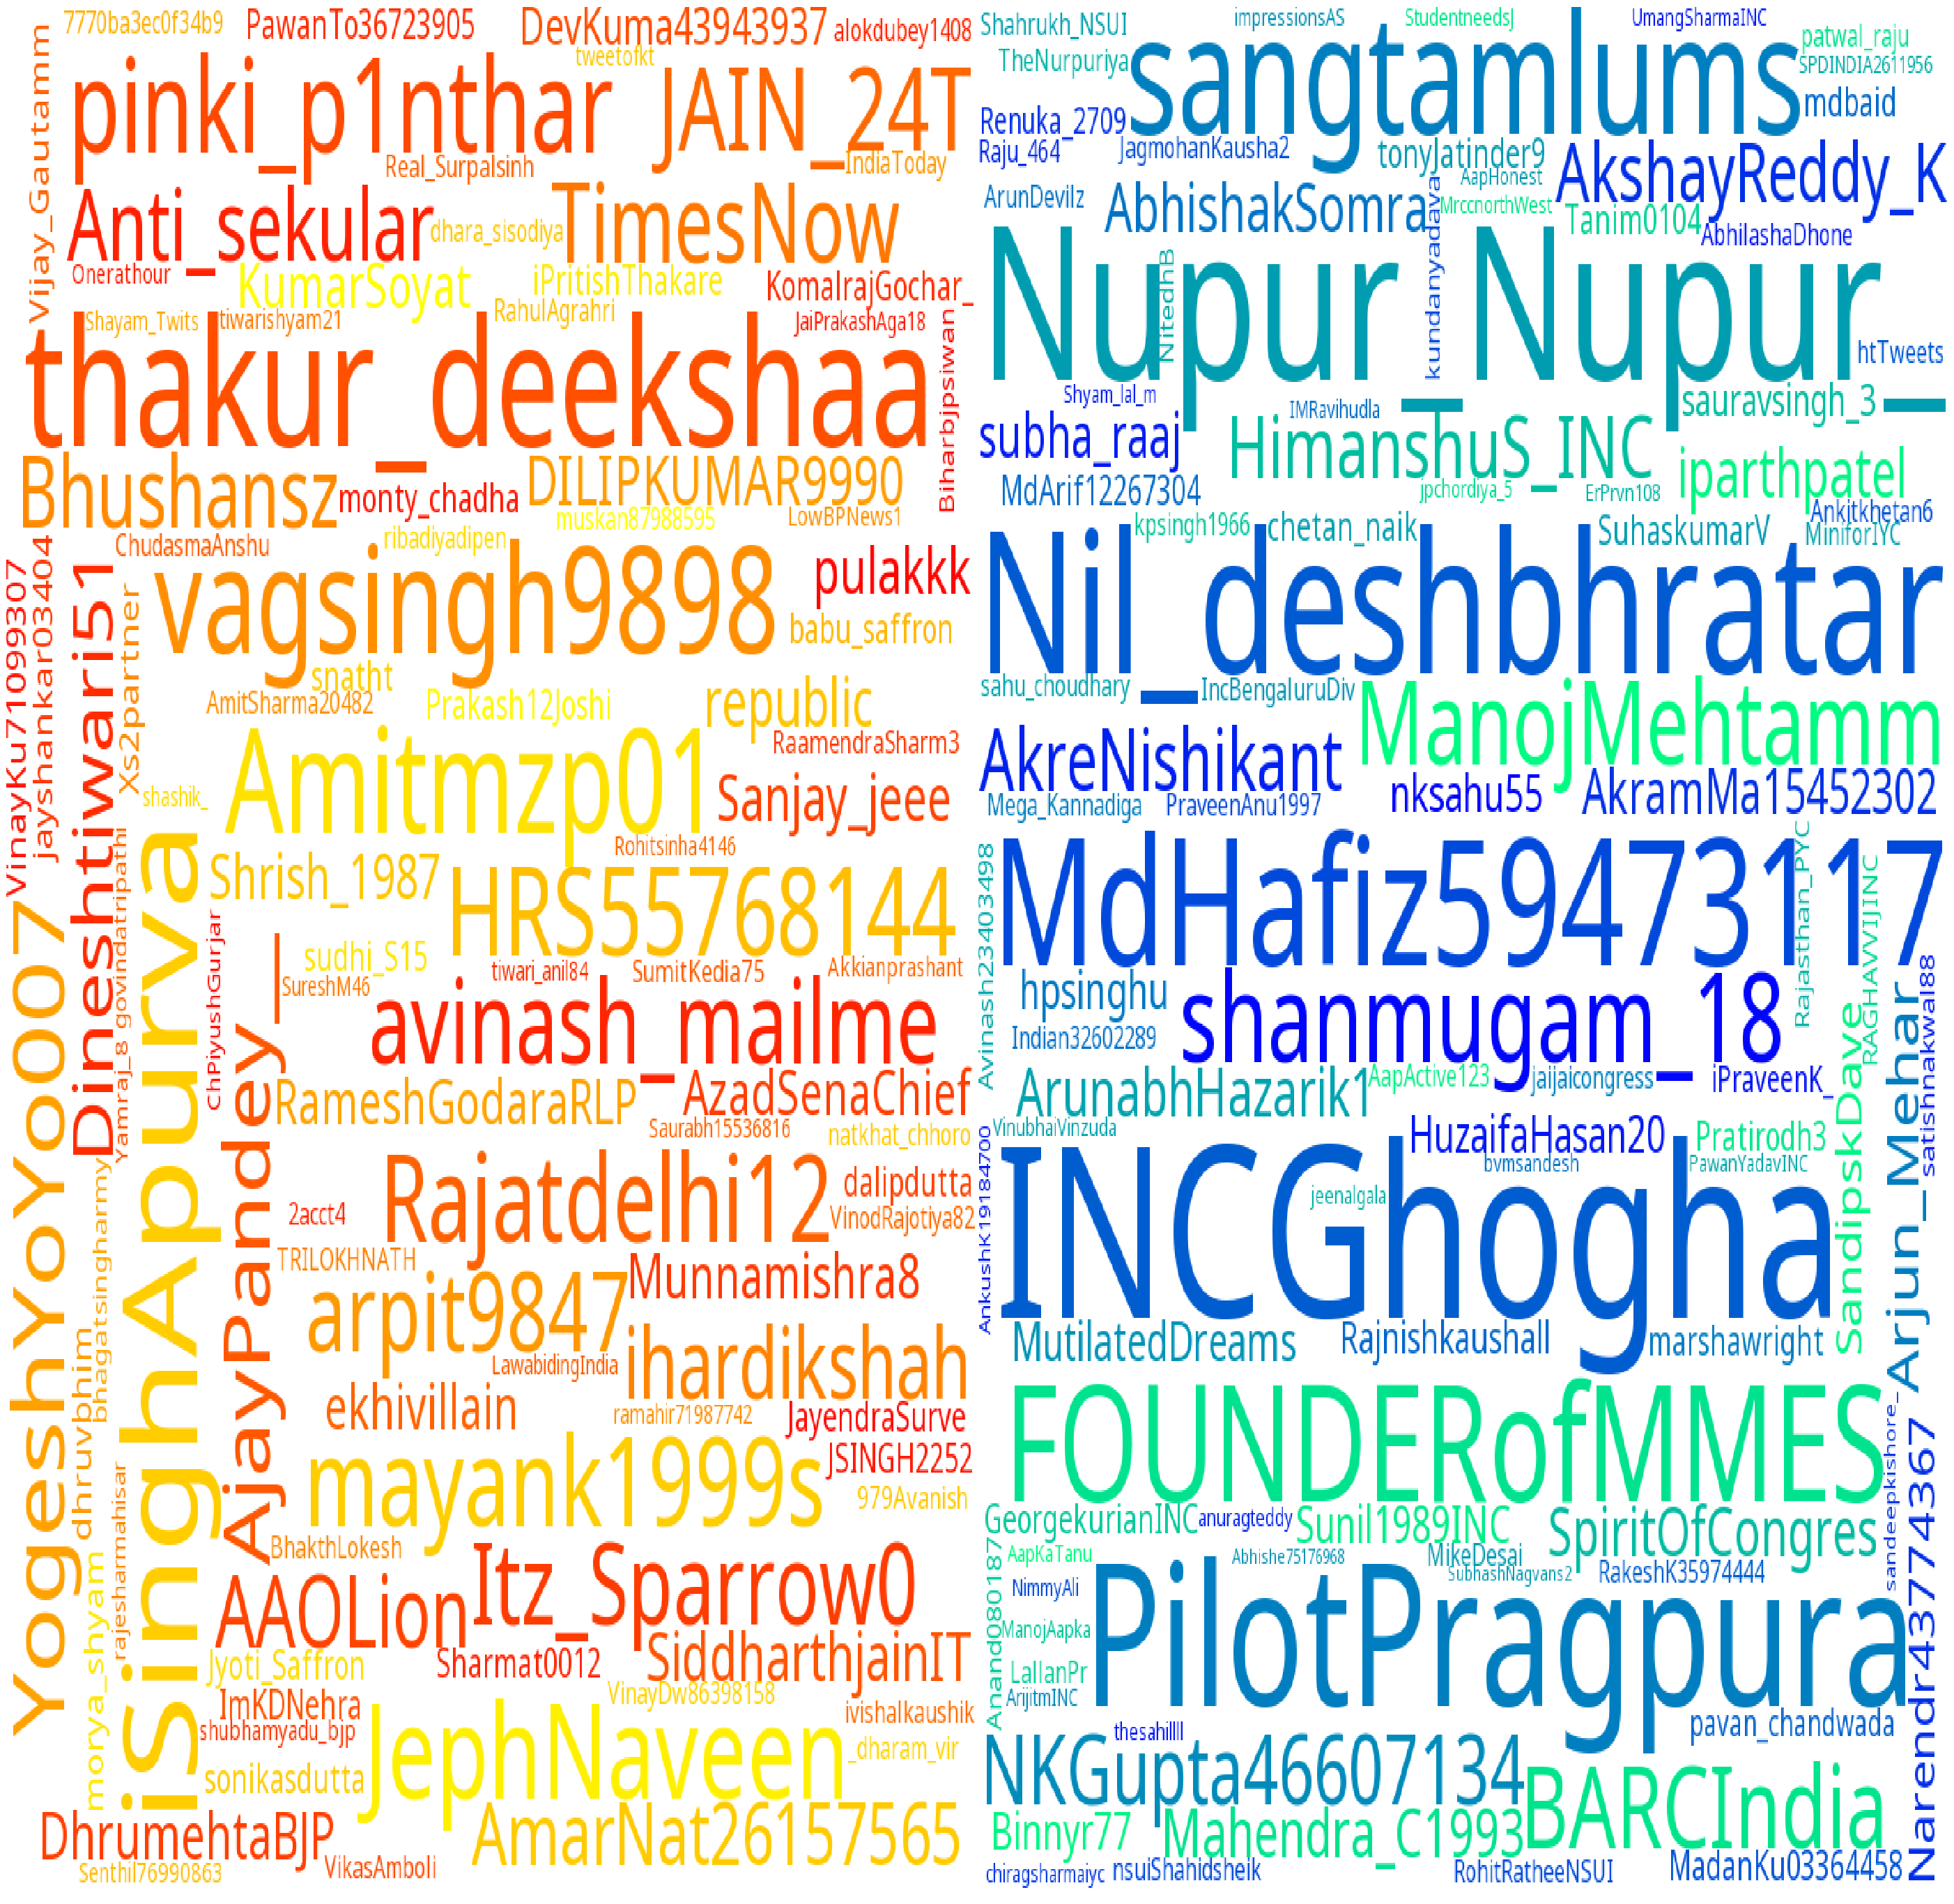

In [2]:
df_handle = tu.get_column_counts_by_cluster(df,column_name='handle',limit=100)
tu.plot_wordclouds_side_by_side(df_handle,"handle","noOfX","cluster_id")

## User analysis
Now that we have identified our users of interest we need to find out detailed information regarding their twitter accounts. We do this to analyse if any patterns are present.


In [3]:
from pprint import pprint
apis = tu.get_tweepy_api()
user_df = pd.DataFrame()
for cluster in tu.CLUSTERS_OF_INTEREST:
    for handle in df_handle[df_handle.cluster_id == cluster].handle:
        try:
            user_info = apis[0].get_user(handle)._json
            user_info["cluster"] = cluster
            user_df = user_df.append(user_info,ignore_index=True)
        except Exception as e:
            print(handle,e)
user_df = user_df.drop(['entities','status'],axis=1)
user_df['created_at']=pd.to_datetime(user_df['created_at'], format="%a %b %d %H:%M:%S %z %Y")

VinayKu71099307 [{'code': 50, 'message': 'User not found.'}]
2acct4 [{'code': 63, 'message': 'User has been suspended.'}]
AkramMa15452302 [{'code': 50, 'message': 'User not found.'}]
MadanKu03364458 [{'code': 50, 'message': 'User not found.'}]
PraveenAnu1997 [{'code': 50, 'message': 'User not found.'}]
VinubhaiVinzuda [{'code': 63, 'message': 'User has been suspended.'}]
bvmsandesh [{'code': 63, 'message': 'User has been suspended.'}]


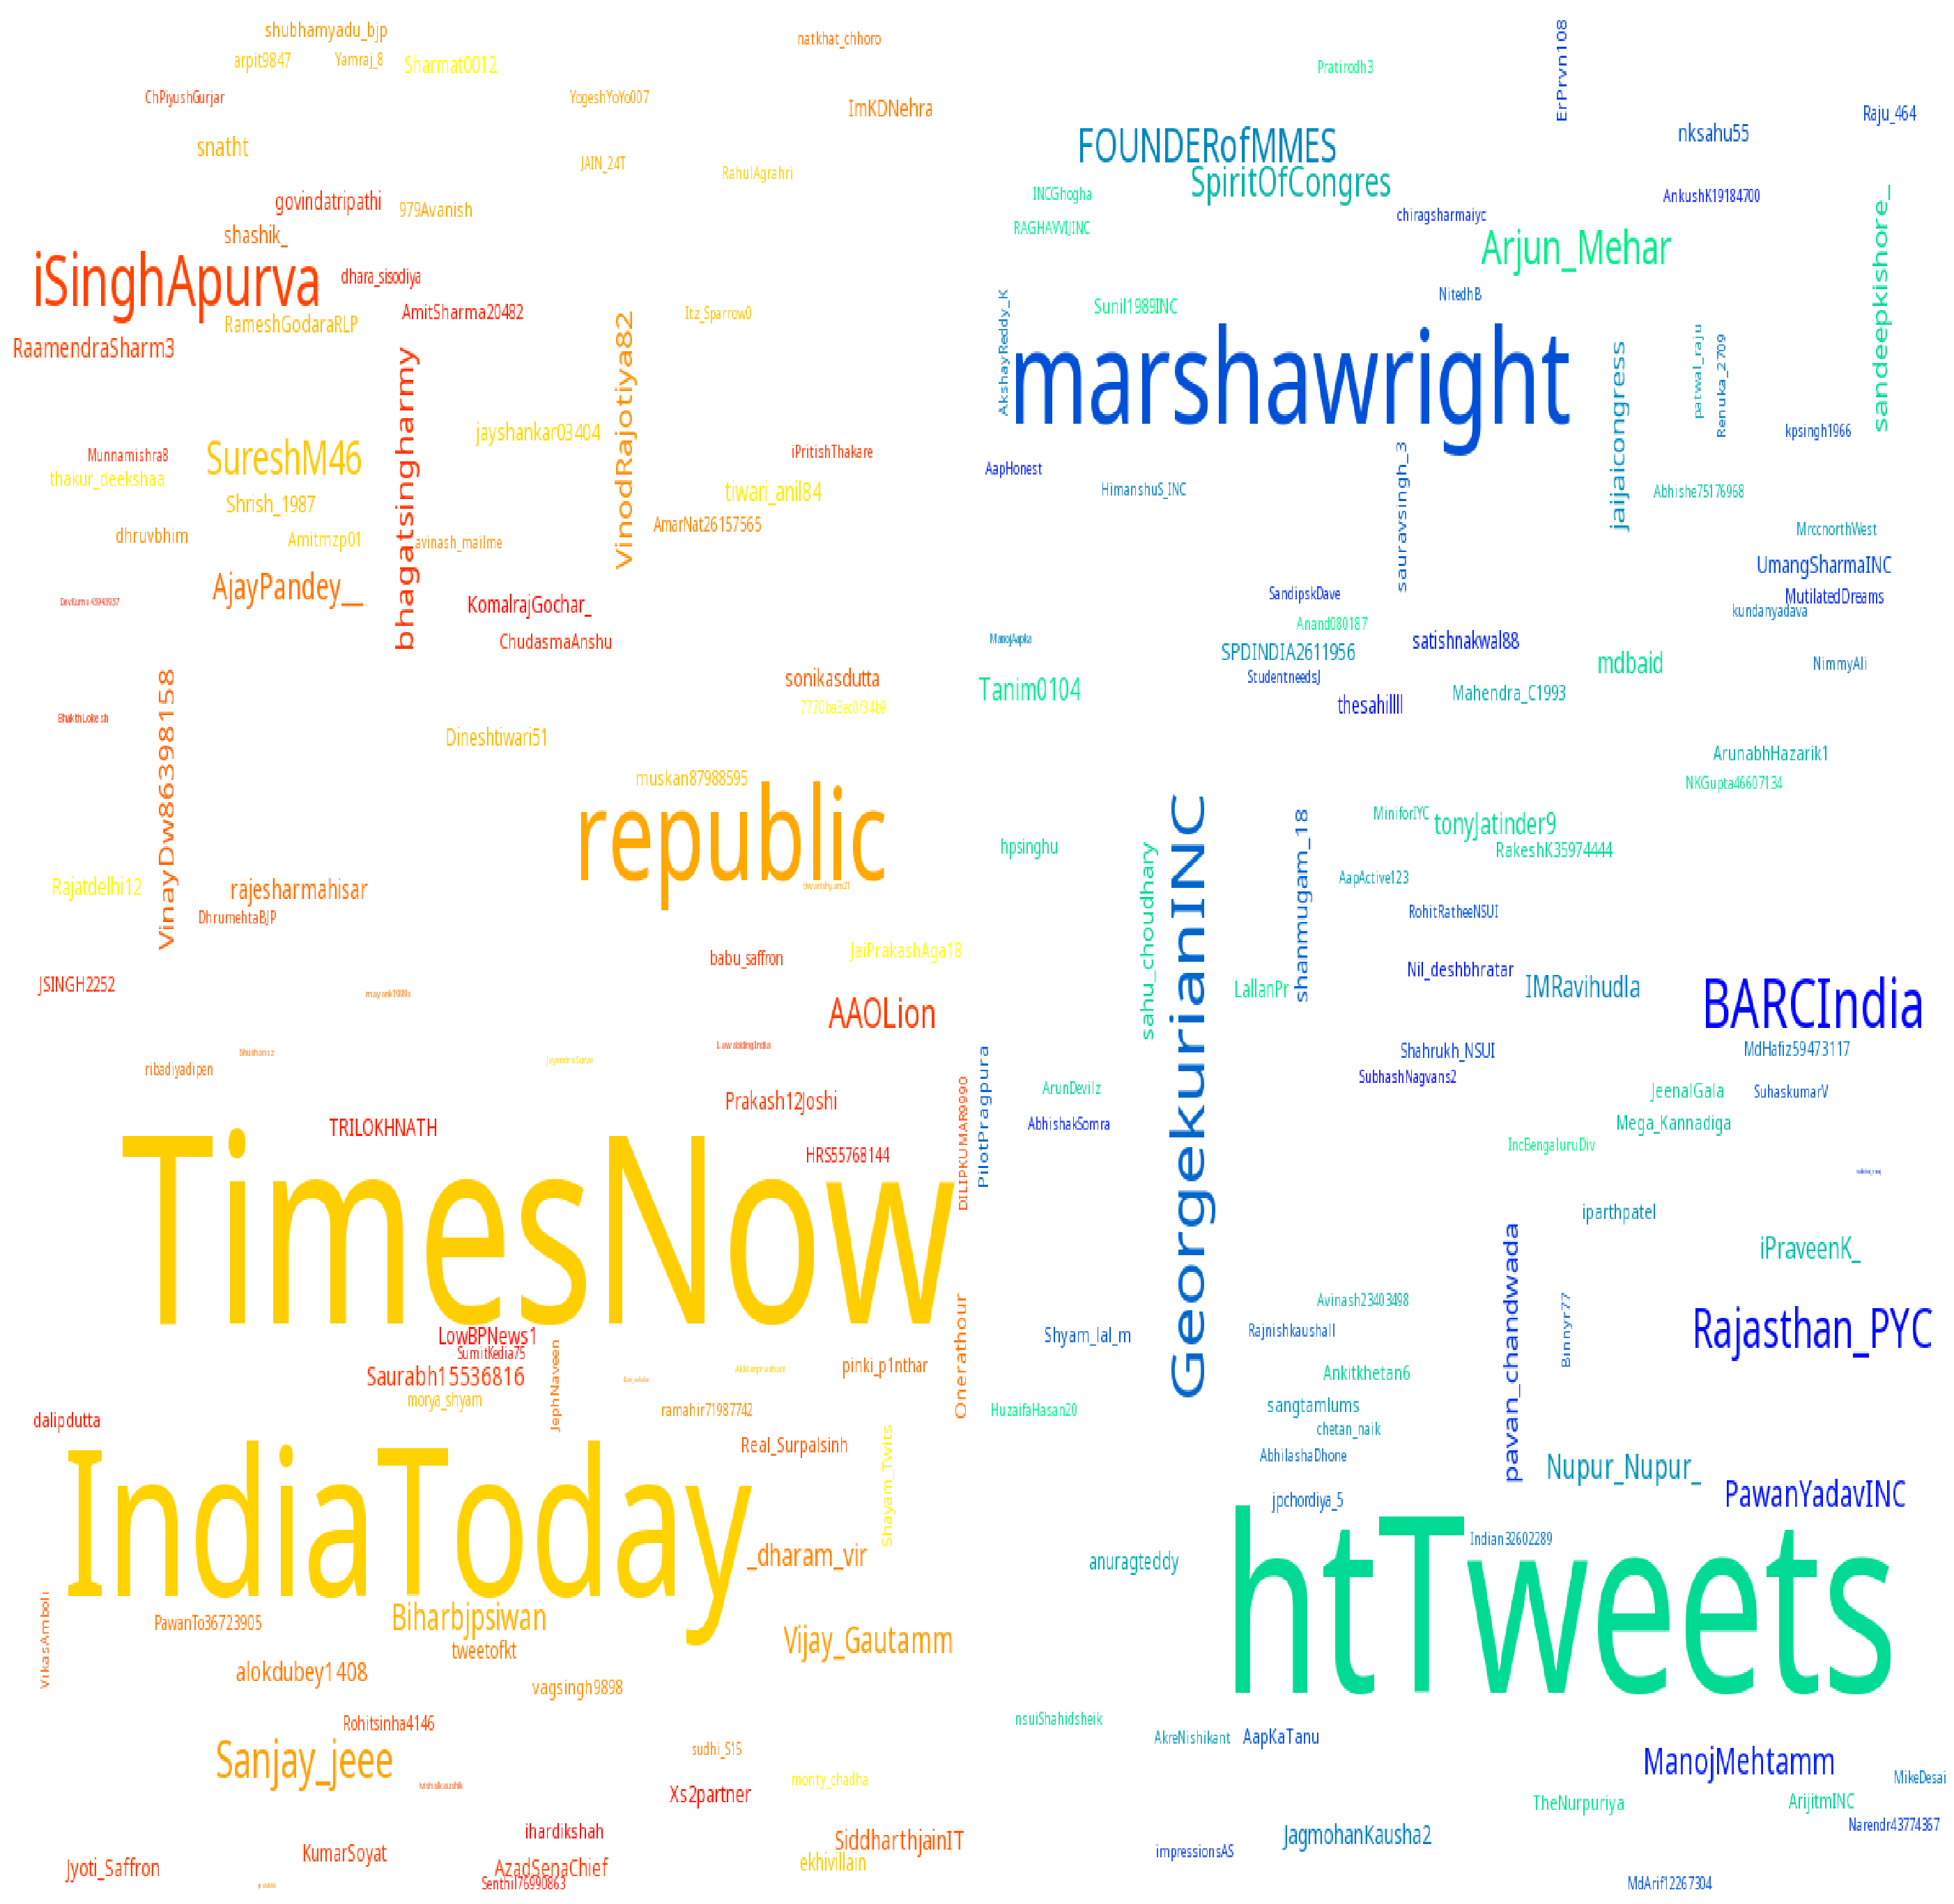

In [4]:
user_df.sort_values("followers_count",axis=0,inplace=True,ascending=False)
tu.plot_wordclouds_side_by_side(user_df,"screen_name","followers_count")

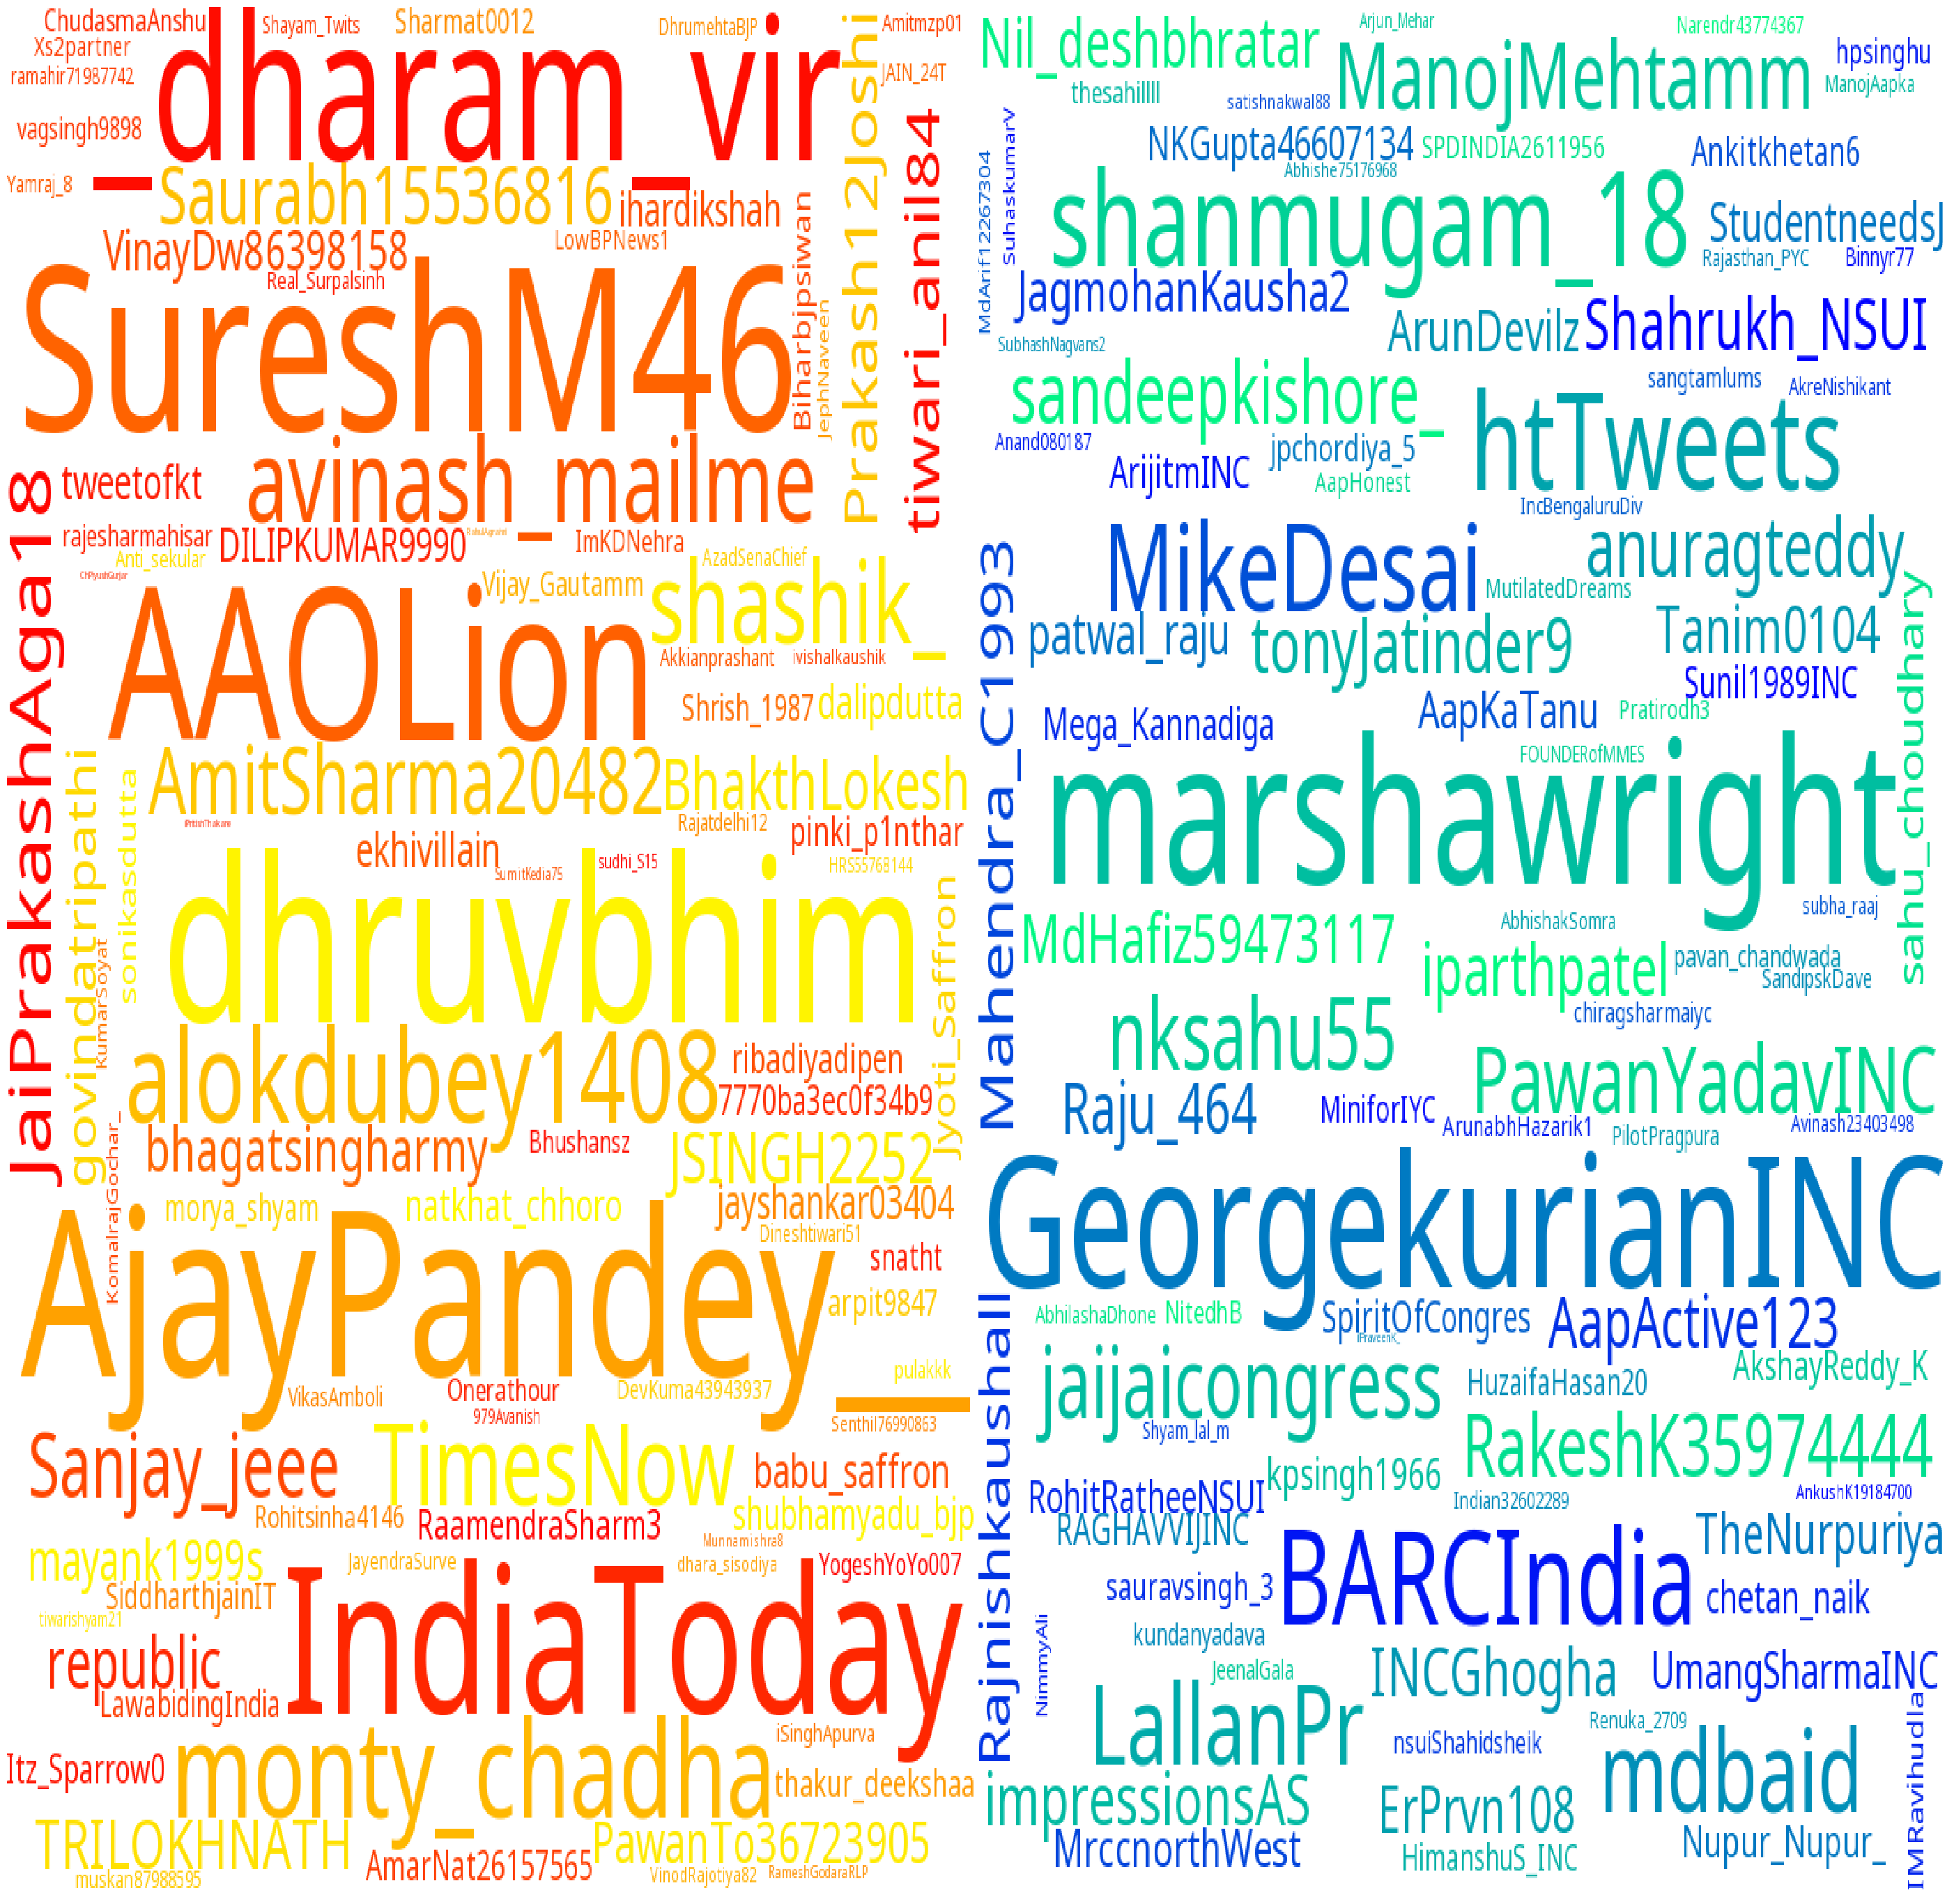

In [5]:
tu.plot_wordclouds_side_by_side(user_df,"screen_name","statuses_count")

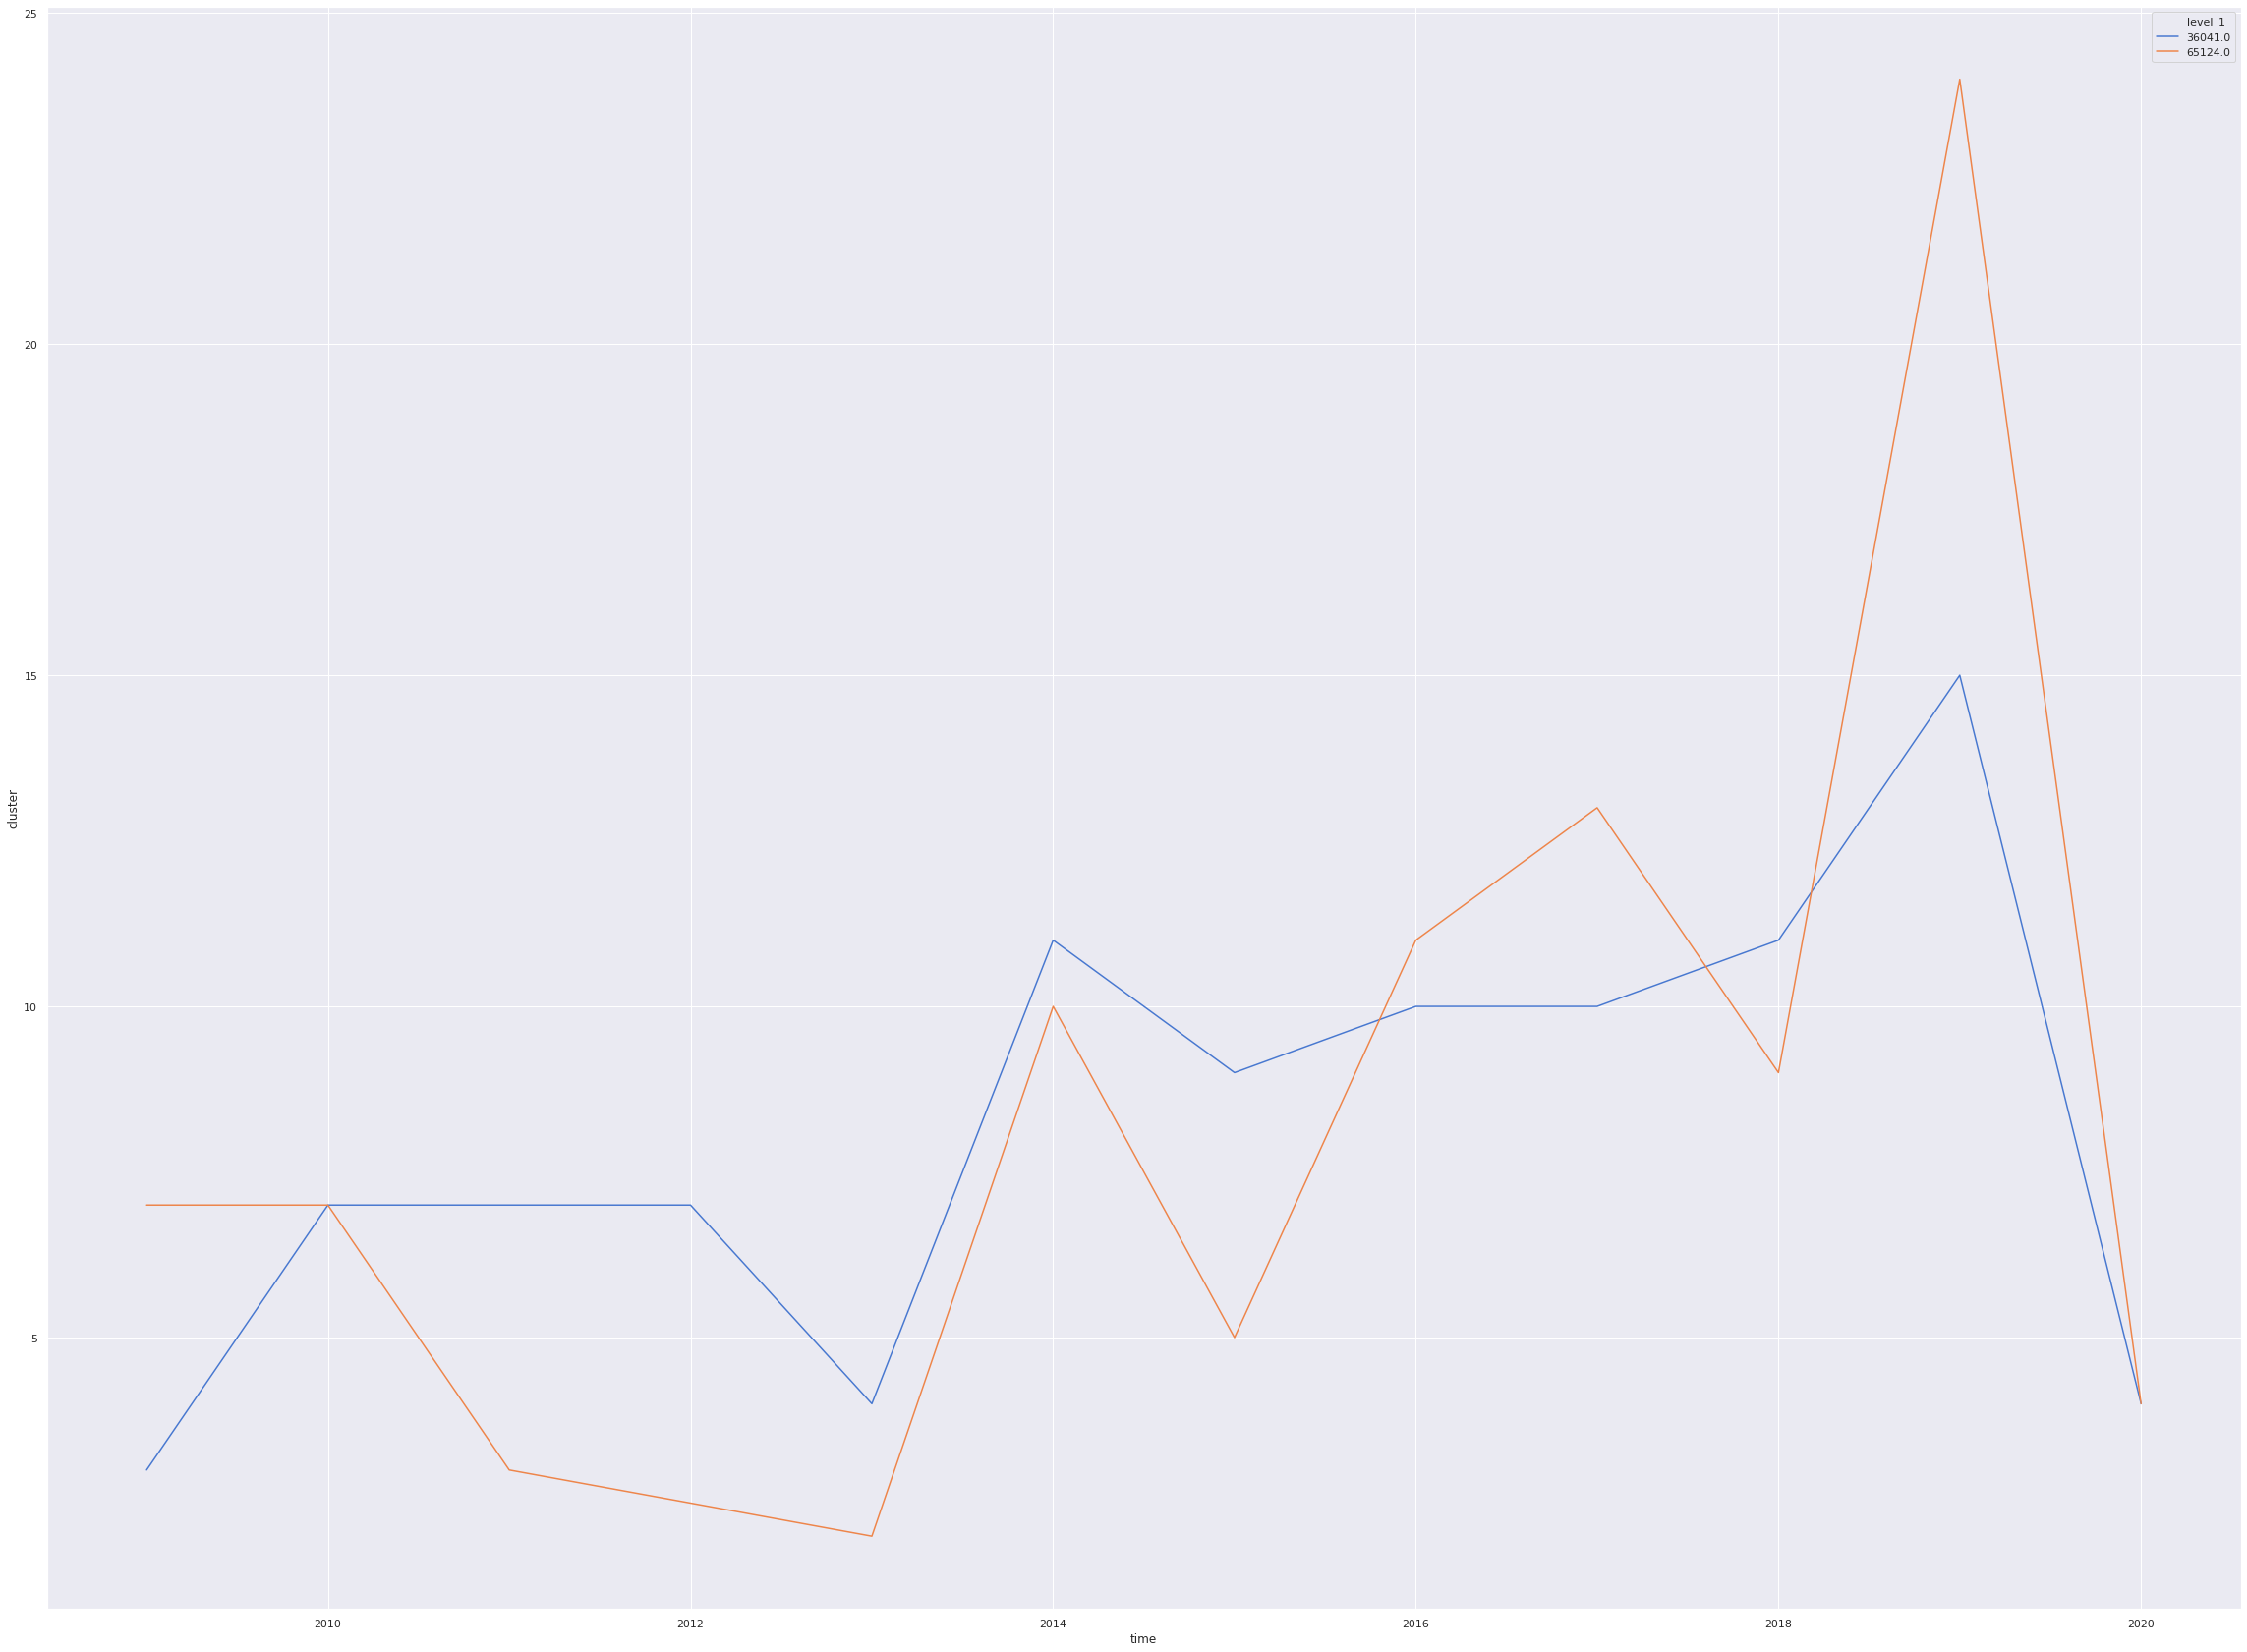

In [6]:
column = user_df.created_at.dt.year
t_df = user_df.groupby(column).cluster.apply(tu.get_cluster_count).reset_index()
t_df["time"] = t_df["created_at"]
tu.plot_timeseries_data(t_df,lineplot=True)

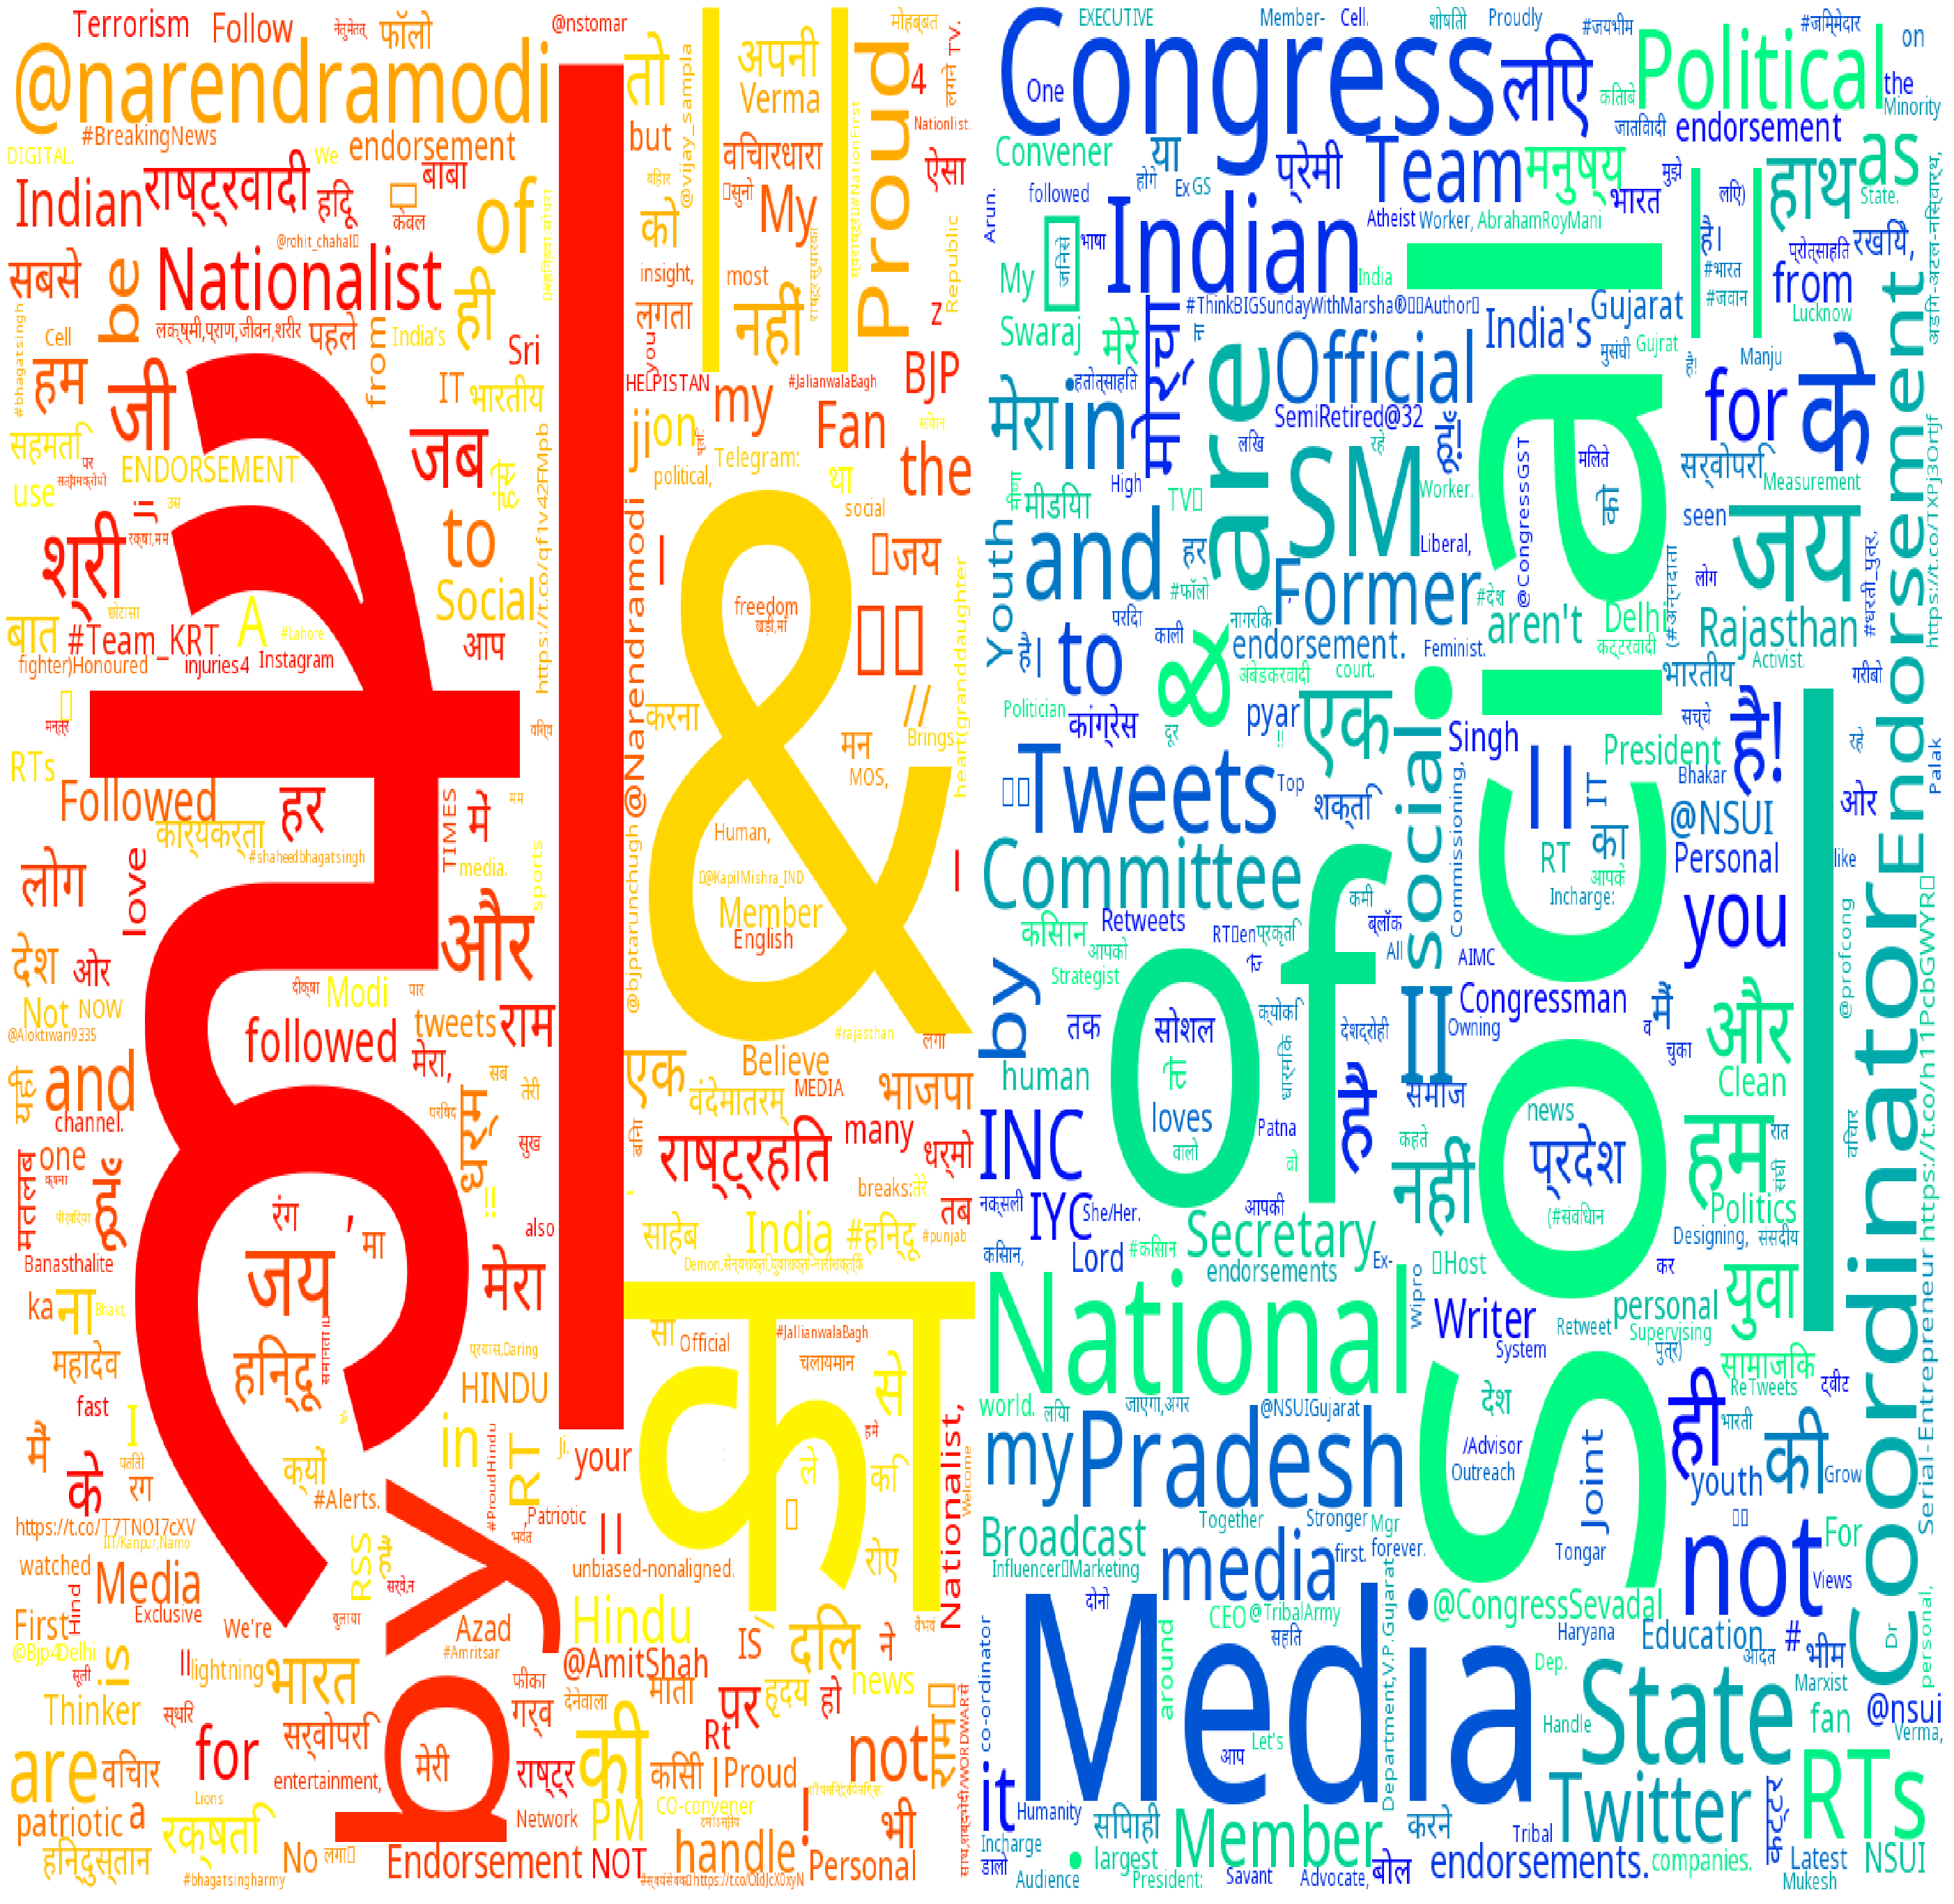

In [7]:
from collections import Counter
def word_acc(series):
    c=Counter()
    for x in series:
        c.update(x.split())
    return pd.Series(dict(c.most_common()))
desc_df = user_df.groupby("cluster").description.apply(word_acc).reset_index()
tu.plot_wordclouds_side_by_side(desc_df,"level_1","description")

In [9]:
temp_dict = dict(desc_df.drop("cluster",axis=1).to_dict('split')['data'])

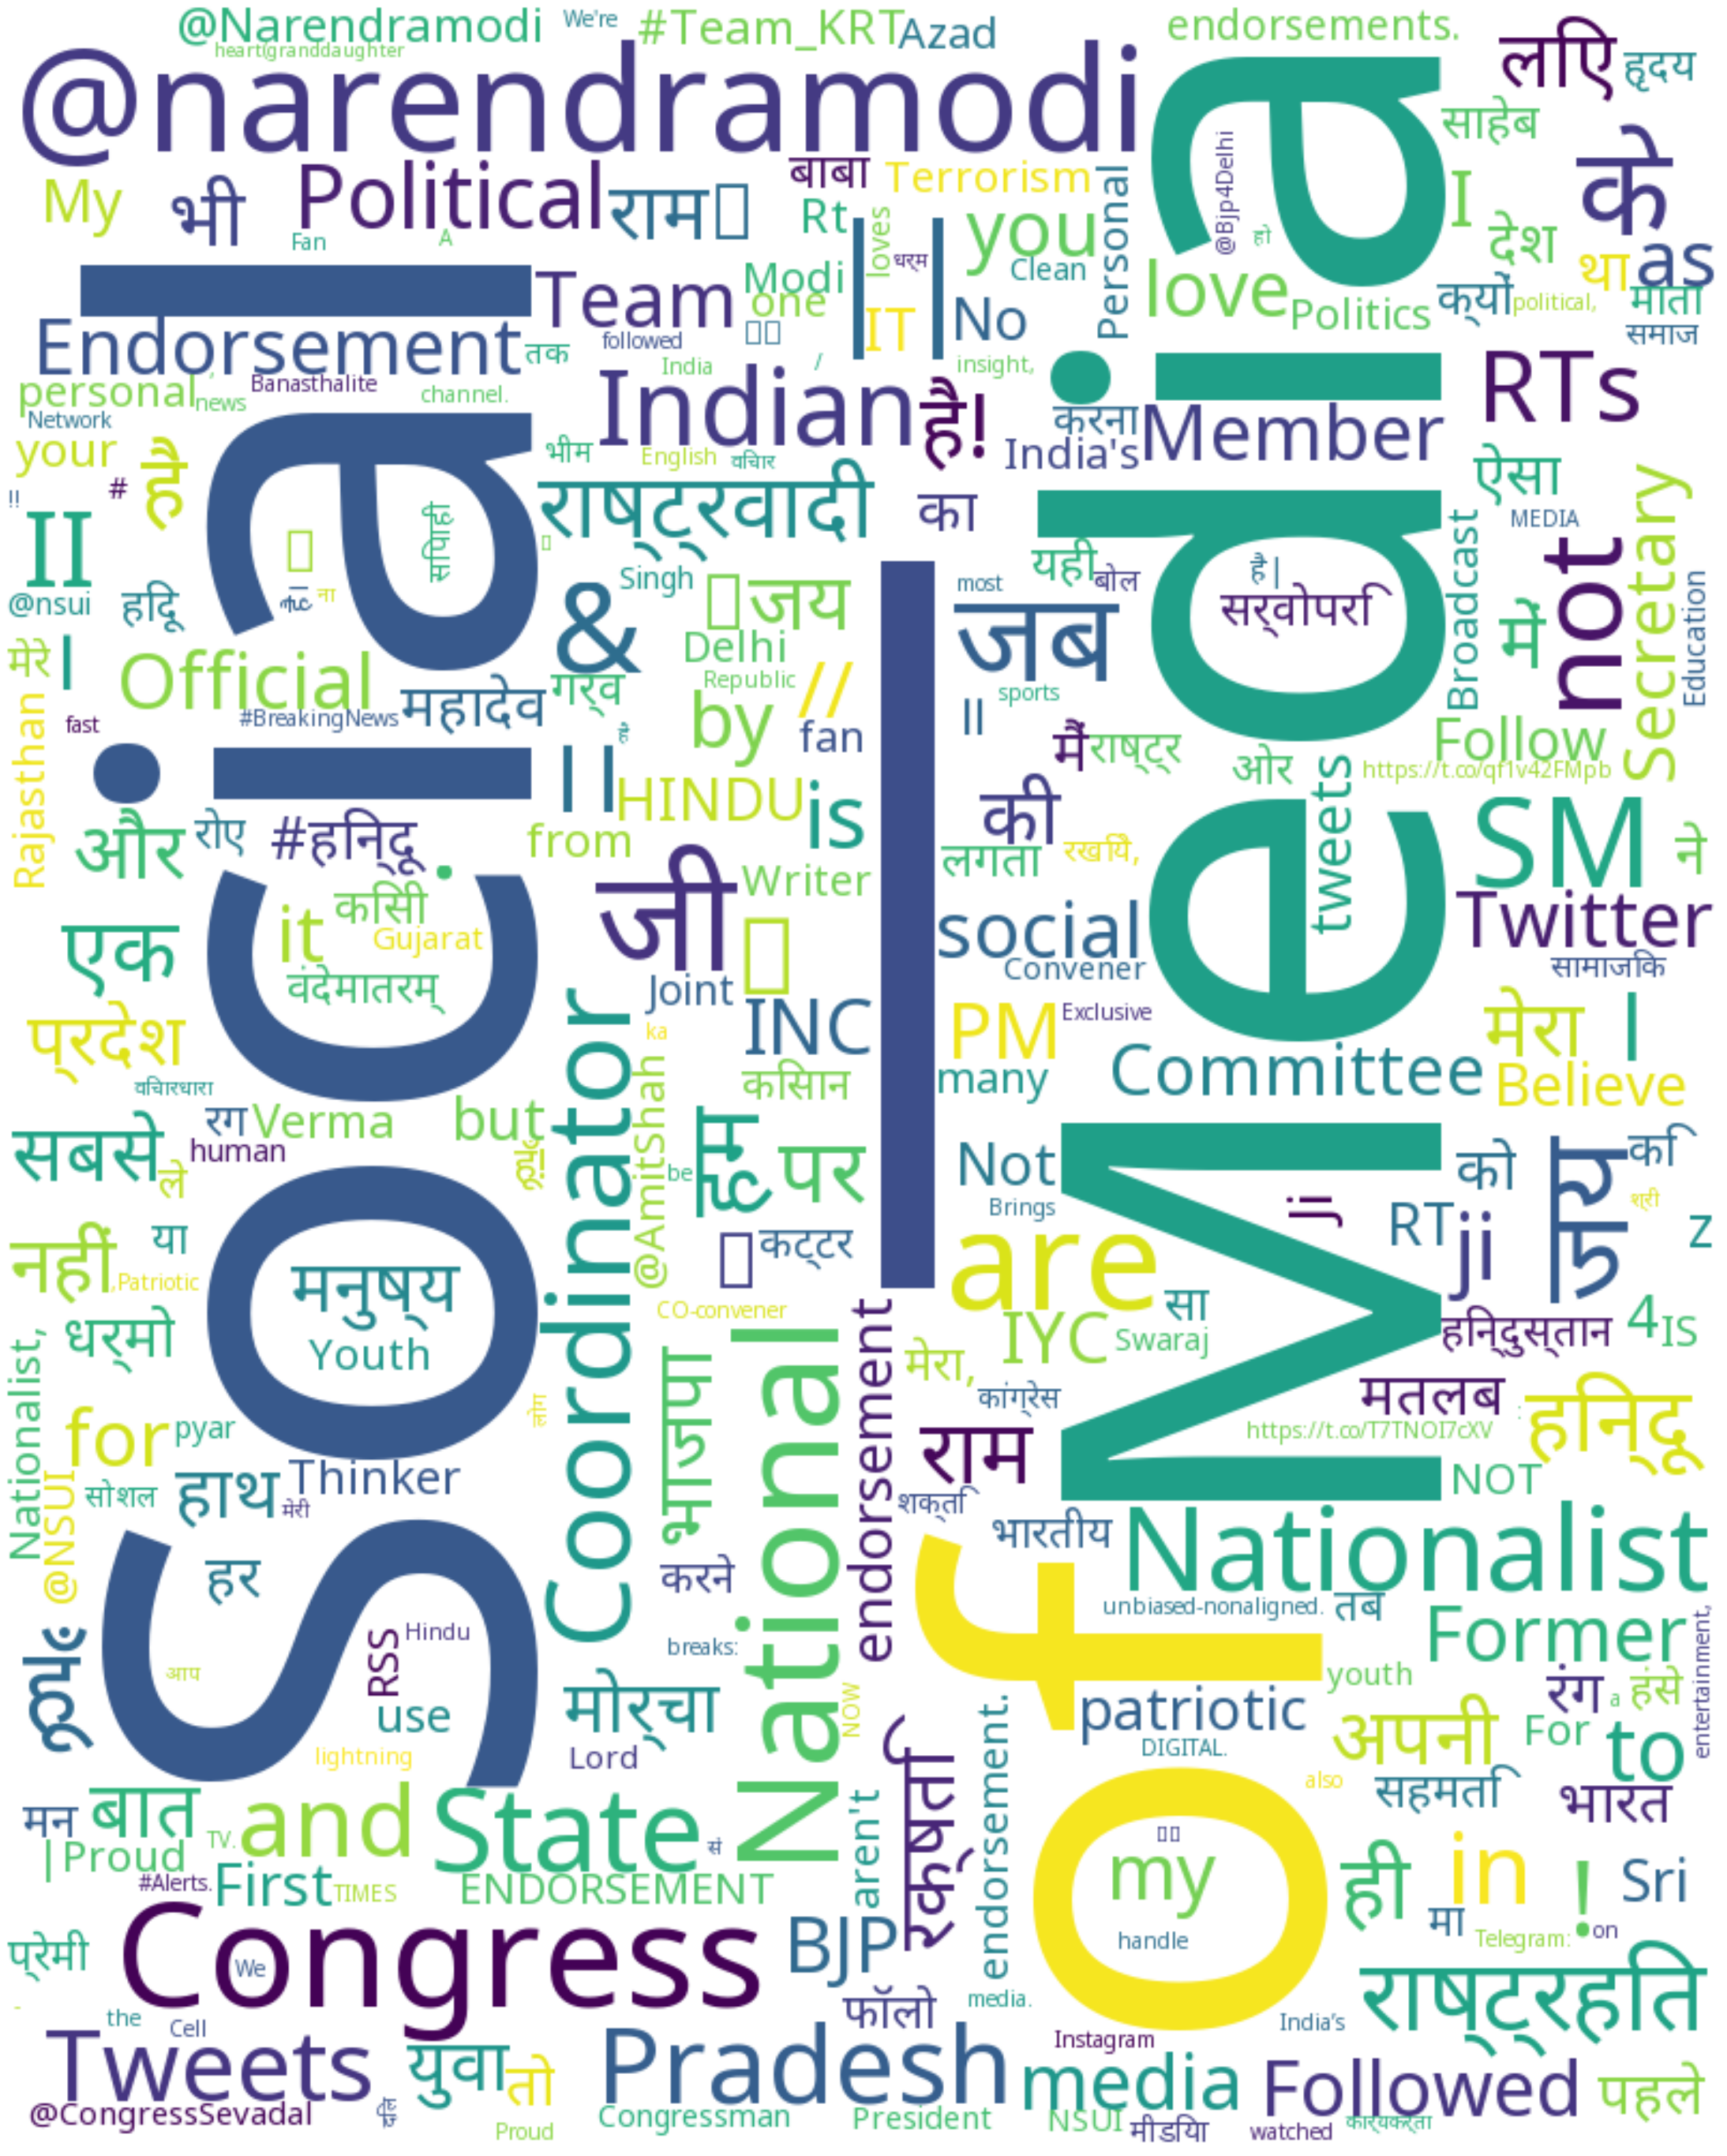

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

figsize=(50, 50)
word_cloud = WordCloud(font_path="files/merged.ttf",background_color="white", width=800, height=1000, max_words=300,
                          colormap="viridis").generate_from_frequencies(frequencies=temp_dict)
plt.figure(figsize=figsize)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()